<a href="https://colab.research.google.com/github/cclmcesarschool/RNA-e-Deep-Learning---CESAR-School-2023.2/blob/main/Atividade_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício Regressão Linear com PyTorch

O objetivo desse notebook é reescrevê-lo porém utilizando tensores do PyTorch.

Os nomes das funções do PyTorch são próximas das funções do Torch original escrito na linguagem Lua, porém não são iguais.

Refaça o código de treinamento da rede, mas agora utilizando somente Tensores do PyTorch. Faça o mesmo procedimento que o notebook [LinearRegressionIrisNumPy](LinearRegressionIrisNumPy.ipynb). Para consultar as operações disponíveis no PyTorch use a [documentação do PyTorch](http://pytorch.org/docs/master/torch.html).

Funções que podem ser úteis:
- torch.t
- torch.mean
- torch.matmul

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
data = iris.data[iris.target == 1, ::2]

x_in = data[:,0:1]
y_in = data[:,1:2]

x_train = torch.FloatTensor(x_in)
y_train = torch.FloatTensor(y_in)

n_samples = x_train.size(0)
print('x_train.shape:', x_train.shape, type(x_train))
print('y_train.shape:',y_train.shape, type(y_train))

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

iris_pd = pd.DataFrame(x_in, columns=['x_in'])
iris_pd['y_in'] = y_in
iris_pd.head


x_train.shape: torch.Size([50, 1]) <class 'torch.Tensor'>
y_train.shape: torch.Size([50, 1]) <class 'torch.Tensor'>
x_train[:5]:
 tensor([[7.0000],
        [6.4000],
        [6.9000],
        [5.5000],
        [6.5000]])
y_train[:5]:
 tensor([[4.7000],
        [4.5000],
        [4.9000],
        [4.0000],
        [4.6000]])


<bound method NDFrame.head of     x_in  y_in
0    7.0   4.7
1    6.4   4.5
2    6.9   4.9
3    5.5   4.0
4    6.5   4.6
5    5.7   4.5
6    6.3   4.7
7    4.9   3.3
8    6.6   4.6
9    5.2   3.9
10   5.0   3.5
11   5.9   4.2
12   6.0   4.0
13   6.1   4.7
14   5.6   3.6
15   6.7   4.4
16   5.6   4.5
17   5.8   4.1
18   6.2   4.5
19   5.6   3.9
20   5.9   4.8
21   6.1   4.0
22   6.3   4.9
23   6.1   4.7
24   6.4   4.3
25   6.6   4.4
26   6.8   4.8
27   6.7   5.0
28   6.0   4.5
29   5.7   3.5
30   5.5   3.8
31   5.5   3.7
32   5.8   3.9
33   6.0   5.1
34   5.4   4.5
35   6.0   4.5
36   6.7   4.7
37   6.3   4.4
38   5.6   4.1
39   5.5   4.0
40   5.5   4.4
41   6.1   4.6
42   5.8   4.0
43   5.0   3.3
44   5.6   4.2
45   5.7   4.2
46   5.7   4.2
47   6.2   4.3
48   5.1   3.0
49   5.7   4.1>

Text(0, 0.5, 'Comprimento petalas')

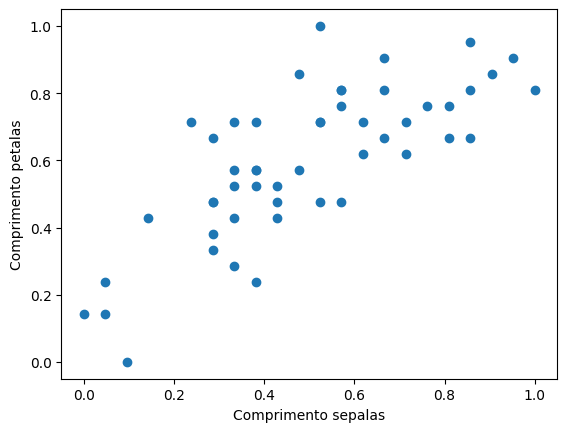

In [ ]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


ones_column = torch.ones(x_train.size(0), 1, dtype=torch.float32)
x_train_bias = torch.cat((ones_column, x_train), dim=1)

plt.scatter(x_train,y_train)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Uma entrada e uma saída

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = LinearRegressionModel()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=2)

In [ ]:
losses = []

num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()

    y_pred = model(x_train)

    loss = criterion(y_pred, y_train)

    loss.backward()

    # Update weights
    optimizer.step()

    # Armazenar o valor da perda
    losses.append(loss.item())

    # Exibição do progresso
    if (epoch + 1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch + 1, num_epochs, loss.item()))

Epoch[1/1000], loss: 0.124439
Epoch[2/1000], loss: 1.202261
Epoch[3/1000], loss: 18.802151
Epoch[4/1000], loss: 303.573334
Epoch[5/1000], loss: 4909.543945
Epoch[6/1000], loss: 79406.695312
Epoch[7/1000], loss: 1284325.625000
Epoch[8/1000], loss: 20772724.000000
Epoch[9/1000], loss: 335978688.000000
Epoch[10/1000], loss: 5434130944.000000
Epoch[11/1000], loss: 87891812352.000000
Epoch[12/1000], loss: 1421565231104.000000
Epoch[13/1000], loss: 22992448913408.000000
Epoch[14/1000], loss: 371880615739392.000000
Epoch[15/1000], loss: 6014808029659136.000000
Epoch[16/1000], loss: 97283697903927296.000000
Epoch[17/1000], loss: 1573469721385238528.000000
Epoch[18/1000], loss: 25449351112084684800.000000
Epoch[19/1000], loss: 411618661736269217792.000000
Epoch[20/1000], loss: 6657532843453262594048.000000
Epoch[21/1000], loss: 107679130542588790046720.000000
Epoch[22/1000], loss: 1741605963047676483207168.000000
Epoch[23/1000], loss: 28168786943108917732835328.000000
Epoch[24/1000], loss: 4556

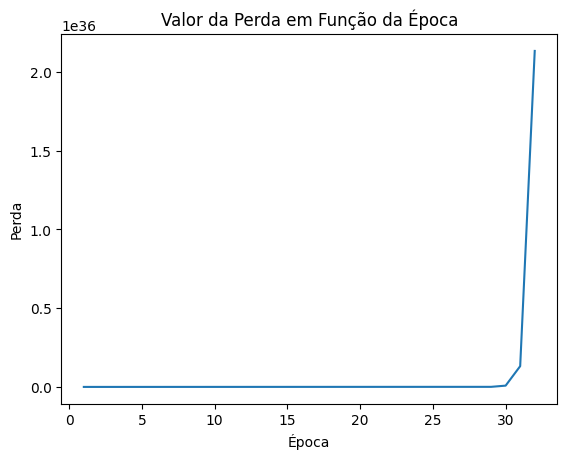

In [ ]:
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Valor da Perda em Função da Época')
plt.show()

In [ ]:
print('x_train_bias é um tensor:', isinstance(x_train_bias, torch.FloatTensor))

print('tamanho do x_train_bias:', x_train_bias.size() == torch.Size([50, 2]))

print('primeira coluna é só de uns:', (x_train_bias[:, 0] == torch.ones(x_train_bias.size(0))).all().item() == 1)

print('segunda coluna é igual a x_train:', (x_train_bias[:, 1] == x_train.reshape(x_train_bias.size(0))).all().item() == 1)

x_train_bias é um tensor: True
tamanho do x_train_bias: True
primeira coluna é só de uns: True
segunda coluna é igual a x_train: True
